In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

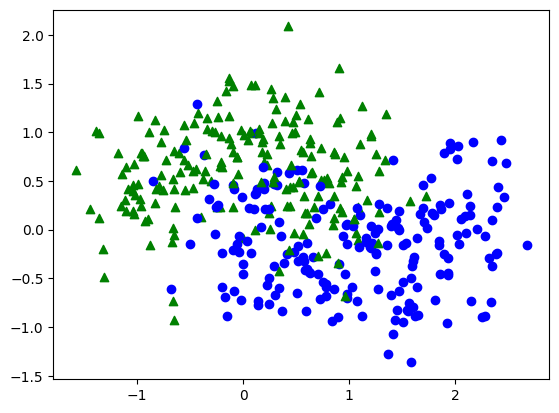

In [2]:
X, y = make_moons(noise=0.4, random_state=105, n_samples=400)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

def plot_target(y):
    colors, markers = [], []
    for i in range(len(y)):
        if (y[i] == 0):
            colors.append('g')
            markers.append('^')
        elif (y[i] == 1):
            colors.append('b')
            markers.append('o')
    return colors, markers
colors, markers = plot_target(y)

for x_s, y_s, c, m in zip(X[:, 0], X[:, 1], colors, markers):
        plt.scatter(x_s, y_s, c=c, marker=m)

plt.show()

## Voting Classification
training **different models** on the **whole training set**

**hard** voting: aggregating predicted classes

**soft** voting: aggregating predicted probabilities (if exists)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [4]:
log_clf = LogisticRegression(C=0.01)
tree_clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=10)
svm_clf = SVC(degree=4, gamma=1, coef0=1, C=0.01)
hard_voting_clf = VotingClassifier(estimators=[('log', log_clf), ('tree', tree_clf), ('svc', svm_clf)], voting='hard')
soft_voting_clf = VotingClassifier(estimators=[('log', log_clf), ('tree', tree_clf)], voting='soft')

In [5]:
print("** Accuracy **")
for clf in (log_clf, tree_clf, svm_clf, hard_voting_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, ":", accuracy_score(y_test, y_pred) * 100, "%")

** Accuracy **
LogisticRegression : 76.875 %
DecisionTreeClassifier : 82.5 %
SVC : 48.75 %
VotingClassifier : 76.875 %
VotingClassifier : 82.5 %


## Bagging / Pasting

training **a specified model** on different **samples of training set**

**bagging** (bootstrap aggregating): sampling **with** replacement $\rightarrow$ `bootstrap = True`

**pasting**: sampling **without** replacement $\rightarrow$ `bootstrap = False`

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [7]:
# bagging
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 500,
                           max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

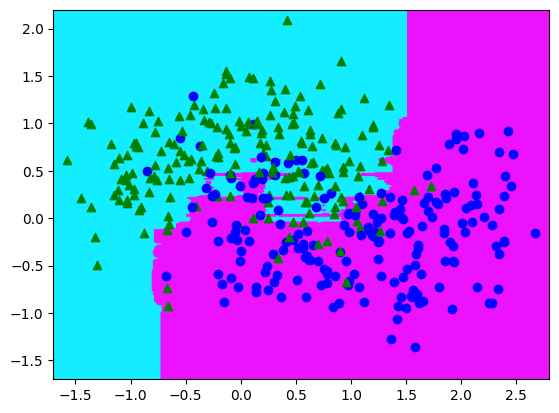

In [8]:
xx, yy = np.meshgrid(np.linspace(-1.7, 2.8, 450), np.linspace(-1.7, 2.2, 390))
z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.cool)
for x_s, y_s, c, m in zip(X[:, 0], X[:, 1], colors, markers):
        plt.scatter(x_s, y_s, c=c, marker=m)

plt.show()

### Out-of-Bag (OOB) Evaluation:
using each predictor's **unseen training instances** to evaluate the model

In [9]:
# bagging with oob
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 500,
                           max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [10]:
print('oob score:', bag_clf.oob_score_ * 100, '%')
print('accuracy:', accuracy_score(y_test, y_pred) * 100, '%')
print(bag_clf.oob_decision_function_)

oob score: 83.33333333333334 %
accuracy: 88.125 %
[[0.25609756 0.74390244]
 [0.03303303 0.96696697]
 [0.64179104 0.35820896]
 [0.16716418 0.83283582]
 [0.02201258 0.97798742]
 [0.99137931 0.00862069]
 [0.65486726 0.34513274]
 [0.96428571 0.03571429]
 [0.0733945  0.9266055 ]
 [0.2        0.8       ]
 [0.01829268 0.98170732]
 [0.82153846 0.17846154]
 [0.2245509  0.7754491 ]
 [0.10062893 0.89937107]
 [0.04294479 0.95705521]
 [0.08049536 0.91950464]
 [0.93731343 0.06268657]
 [0.95795796 0.04204204]
 [0.         1.        ]
 [0.51735016 0.48264984]
 [0.97791798 0.02208202]
 [0.96745562 0.03254438]
 [0.52469136 0.47530864]
 [0.94970414 0.05029586]
 [0.07902736 0.92097264]
 [0.75667656 0.24332344]
 [0.98809524 0.01190476]
 [0.98498498 0.01501502]
 [0.96048632 0.03951368]
 [0.99053628 0.00946372]
 [0.91411043 0.08588957]
 [0.21824104 0.78175896]
 [0.94769231 0.05230769]
 [0.41233766 0.58766234]
 [0.         1.        ]
 [0.92378049 0.07621951]
 [0.98198198 0.01801802]
 [0.08414239 0.91585761]


### Random Patches:
sampling **instances and features** (better to use for *high-dimensional* inputs)

In [11]:
# random patches
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 500,
                           max_samples=0.25, bootstrap=True, n_jobs=-1,
                           max_features=0.5, bootstrap_features=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [12]:
print('accuracy:', accuracy_score(y_test, y_pred) * 100, '%')

accuracy: 80.0 %


### Random Subspaces:
sampling **only features** (better to use for *high-dimensional* inputs)

In [13]:
# random subspaces
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 500,
                           max_samples=1.0, bootstrap=False, n_jobs=-1,
                           max_features=0.5, bootstrap_features=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [14]:
print('accuracy:', accuracy_score(y_test, y_pred) * 100, '%')

accuracy: 63.74999999999999 %


## Random Forest

*Random Forest* is a bagging/pasting model with the `base_estimator` set to **DecisionTree**; and some other default values

feature selection in each node is done through **a random subset of features**

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# random forest using RandomForestClassifier
rnd_forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_forest.fit(X_train, y_train)
y_pred = rnd_forest.predict(X_test)

In [17]:
print('accuracy:', accuracy_score(y_test, y_pred) * 100, '%')

accuracy: 86.25 %


In [18]:
# random forest using BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
                            n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [19]:
print('accuracy:', accuracy_score(y_test, y_pred) * 100, '%')

accuracy: 83.75 %


### Extremely Randomized Trees (Extra-Trees):
*Extra-Trees* is like a Random Forest, but there's a difference:

trees in Extra-Trees have **randomly selected thresholds** (not necessarily the best threshold)

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
# Extra Trees
ext_trees = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
ext_trees.fit(X_train, y_train)
y_pred = ext_trees.predict(X_test)

In [22]:
print('accuracy:', accuracy_score(y_test, y_pred) * 100, '%')

accuracy: 81.875 %


### Feature Importance:
a Random Forest metric to measure each featuer's importance

In [23]:
from sklearn.datasets import fetch_openml

In [24]:
mnist = fetch_openml('mnist_784')
print(mnist.keys())

C:\Users\Ausu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [25]:
X = mnist.data
y = mnist.target

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [26]:
rnd_forest = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rnd_forest.fit(X_train, y_train)
y_pred = rnd_forest.predict(X_test)

In [27]:
print('accuracy', accuracy_score(y_test, y_pred) * 100, '%')

accuracy 97.07000000000001 %


In [28]:
import seaborn as sns

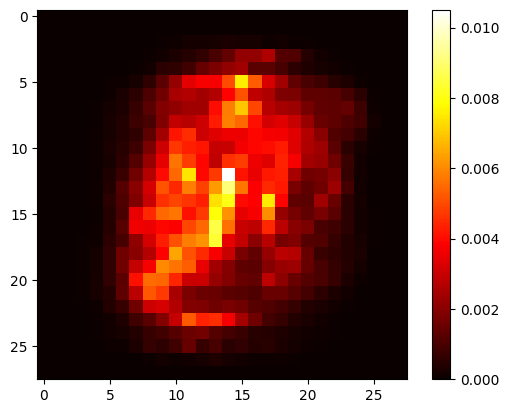

In [29]:
plt.imshow(rnd_forest.feature_importances_.reshape(28, 28), cmap=plt.cm.hot)
plt.colorbar()
plt.show()

## Boosting

### Adaptive Boosting (AdaBoost)
training: each classifier's **incorrect predictions get more weight** and then they be inputted to next classifier

predicting: the **majority of weighted votes** is the result

In [30]:
# scikit-learn
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                            algorithm='SAMME.R', learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred) * 100, '%')

accuracy: 77.85 %


### weighted error rate: $r(predictor) = \dfrac{\sum w^{(i)}\text{ (for incorrect predictions)}}{\sum w^{(i)}}$
### predictor weight: $\alpha(predictor) = \eta \ln\dfrac{1 - r}{r}$
where $\eta$ is the learning rate
### weight update rule: $w^{(i)} = \begin{cases}
w^{(i)} & \text{if } \hat{y}^{(i)} = y^{(i)} \\ w^{(i)} e^{\alpha} & \text{if } \hat{y}^{(i)} \ne y^{(i)}
\end{cases}$
then weights must be **normalized**

In [32]:
import copy
import statistics as st

class AdaBoost:
    def __init__(self, base_estimator, n_estimators=100, learning_rate=1):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.n_classes = None
        self.learning_rate = learning_rate
        self.estimators = []
        self.alphas = []
        
    def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        n_samples = X.shape[0]
        w = np.ones((n_samples,)) / n_samples
        
        for _ in range(self.n_estimators):
            estimator = copy.deepcopy(self.base_estimator)
            estimator.fit(X, y, w)
            y_pred = estimator.predict(X)
            r = sum([w[i] for i in range(n_samples) if y[i] != y_pred[i]]) / sum(w)
            alpha = self.learning_rate * np.log((1 - r) / r)
            w = [w[i] if (y[i] == y_pred[i]) else w[i] * np.exp(alpha) for i in range(n_samples)]
            w /= sum(w)
            
            self.estimators.append(estimator)
            self.alphas.append(alpha)
    
    def predict(self, X):
        n_samples = X.shape[0]
        probs = np.zeros((n_samples, self.n_classes))
        for j in range(self.n_estimators):
            preds = self.estimators[j].predict(X)
            for i in range(n_samples):
                probs[i, int(preds[i])] += self.alphas[j]
        return np.array([np.argmax(probs[i]) for i in range(n_samples)])

In [33]:
ada_clf = AdaBoost(DecisionTreeClassifier(max_depth=7), n_estimators=15, learning_rate=1)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print('accuracy:', accuracy_score(np.array(y_test).astype(int), y_pred) * 100, '%')

accuracy: 89.62 %


### Gradient Boosting

training: first regressor is fitted on the training set, then the next regressor is fitted on the **residual errors** and go on

predicting: **sum of all the regressors**

In [34]:
X = np.linspace(-1, 3, 100).reshape(-1, 1)
y = X ** 2 + 0.5 * np.random.randn(100, 1)
y = y.ravel()

In [35]:
# scikit-learn (base_estimator: DecisionTree)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

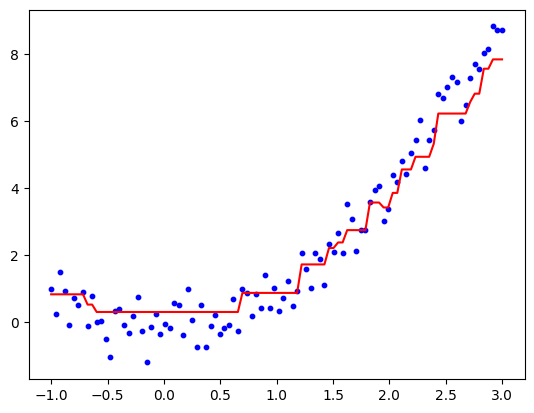

In [36]:
gbrt = GradientBoostingRegressor(n_estimators=3, max_depth=3, learning_rate=0.5)
gbrt.fit(X, y)

plt.scatter(X, y, s=10, c='b')
plt.plot(X, gbrt.predict(X), c='r')
plt.show()

you can use `gbrt.staged_predict(X)` and then `np.argmin(errors)` to find the best *n_estimators*

another way is to implement *early stopping* from scratch

---
`import xgboost` can be used for Gradient Boosting, either

## Stacking

training: training set is divided into **2 subsets**; you use **first subset instances to train $p$ regressors** (just like bagging, pasting, etc.); then you **use the second subset to create a training set with features being the predictions of those $p$ regressors**, and train a blender to aggregate those predictions

predicting: traversing **layer by layer**

In [37]:
class StackRegressor:
    def __init__(self, base_estimator, n_estimators, samples_ratio):
        self.base_estimator = base_estimator
        n_estimators.append(1)
        self.n_estimators = n_estimators
        self.samples_ratio = samples_ratio
        self.estimators = []
        
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_layers = len(self.n_estimators)
        X_subsets, y_subsets = self._make_subsets(X, y)
        X_bagging = X_subsets[0]
        y_bagging = y_subsets[0]
        
        for i in range(n_layers):
            this_layer_estimators = []
            self.estimators.append(this_layer_estimators)
            if i != n_layers - 1:
                X_new = np.zeros((X_subsets[i + 1].shape[0], self.n_estimators[i]))
            for j in range(self.n_estimators[i]):
                estimator = copy.deepcopy(self.base_estimator)
                if i != n_layers - 1:
                    idxs = np.random.randint(X_bagging.shape[0], size=int(self.samples_ratio * X_bagging.shape[0]))
                else: idxs = range(X_bagging.shape[0])
                X_train = X_bagging[idxs]
                y_train = y_bagging[idxs]
                estimator.fit(X_train, y_train)
                this_layer_estimators.append(estimator)
                
                if i != n_layers - 1:
                    X_new[:, j] = estimator.predict(self._predict_until_layer(X_subsets[i + 1], i))
            if i != n_layers - 1:
                X_bagging = X_new
                y_bagging = y_subsets[i + 1]
                
        
    def _make_subsets(self, X, y):
        n_layers = len(self.n_estimators)
        n_features = X.shape[1]
        data = np.concatenate((X, y.reshape(-1, 1)), axis=1)
        data = np.random.permutation(data)
        subsets = np.array_split(data, n_layers)
        X_subsets, y_subsets = [], []
        for subset in subsets:
            X_subsets.append(subset[:, :n_features])
            y_subsets.append(subset[:, n_features])
        return X_subsets, y_subsets
        
        
    def _predict_until_layer(self, X, layer_number):
        X_test = X
        n_layers = len(self.n_estimators)
        for i in range(layer_number):
            X_new = np.zeros((X.shape[0], self.n_estimators[i]))
            for j in range(self.n_estimators[i]):
                X_new[:, j] = self.estimators[i][j].predict(X_test)
            X_test = X_new
        return X_test
        
        
    def predict(self, X):
        n_layers = len(self.n_estimators)
        return self._predict_until_layer(X, n_layers).ravel()

In [38]:
from sklearn.svm import SVR
stack_reg = StackRegressor(SVR(degree=1, coef0=1, gamma=0.8),
                           n_estimators=[3, 2], samples_ratio=1.0)
stack_reg.fit(X, y)

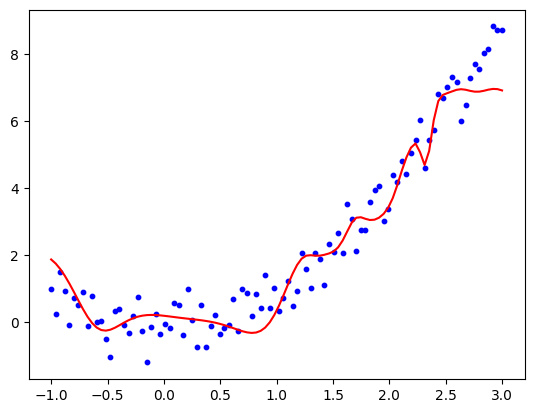

In [39]:
plt.scatter(X, y, s=10, c='b')
plt.plot(X, stack_reg.predict(X), c='r')
plt.show()

there is no implementation for Stacking in Scikit-Learn, but you can use open source implementations such as `brew`